# ***Toronto Housing Market***

# Housing market in Toronto is hot. During this pandemic, I have heard demand for housing has been increased and prices has gone up, so it's not a bad idea to check this. I was not able to obtain recent data and only data I was able to get was from Kaggle which is provided to public by Toronto Real Estate Board. I created this analysis so once TREBB release new dataset I have my code ready.


# Set up - Imports and Reading

In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import itertools
import folium
from folium import Map

In [ ]:
# Reading database
database=pd.read_csv('properties.csv')
database.head()


,Unnamed: 0,Address,AreaName,Price ($),lat,lng
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118


# Clean up

In [ ]:
# Cleaning data with unacceptable latitude and longitude values, and reasonable lower price
database=database.drop(database[abs(database.lat>90)].index)
database=database.drop(database[abs(database.lng>180)].index)
database=database.dropna()
database=database.drop(database[database['Price ($)']<100000].index)

In [ ]:
print(database.size)
print(database.shape)
database['Price ($)'].max()

133716
(22286, 6)


32500000

The dataset seems to have areaname, but I don't know the all the areas in Greater Toronto Area, so I decided to clean it up with lat and lng information

In [ ]:
# Finding distance from the centre of Toronto. I pick Allen road and eEnglinton as the centre
# and I am going to find 40km range away from this point. This point coordinate
# are : lat (43.73976) and long (-79.42126)


# here a distance finder function has been created:

from geopy.distance import geodesic
def distance_finder (lat, lng):
  centre = (43.73976, -79.42126)
  point= (lat,lng)
  distance= geodesic(centre, point).km
  return distance
 
# lambda operation on Database
database['Distance']=database.apply(lambda x: distance_finder(x['lat'],x['lng']), axis=1)
# df is the area of my interest
df=database[database['Distance']<15]

 

In [ ]:
# since the data set includes all the transaction in Ontario, I would like to check there is no record outside of the -
# region of my interest

locations = df[['lat', 'lng']]
locationlist = locations.values.tolist()
len(locationlist)


map = folium.Map(location=[43.73976, -79.42126], zoom_start=10)
for i in range(0, len(locationlist)):
    folium.Marker(locationlist[i]).add_to(map)
map




# Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


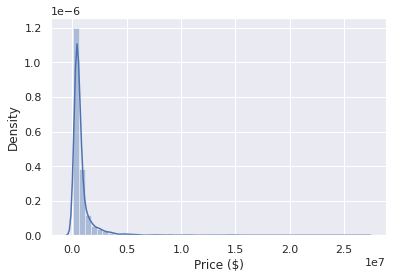

In [ ]:
#quick sns distribution graph
ax = sns.distplot(df['Price ($)'])
# Show data is skewed

In [ ]:
#checking dataset
df.describe()

,Unnamed: 0,Price ($),lat,lng,Distance
count,4590.000000,4.590000e+03,4590.000000,4590.000000,4590.000000
mean,39078.920915,8.258964e+05,43.715426,-79.405040,9.271488
std,29697.845972,1.179302e+06,0.063987,0.077623,3.561755
min,0.000000,1.000000e+05,43.615078,-79.605835,0.229304
25%,6175.250000,3.499000e+05,43.656661,-79.447968,6.692606
50%,36149.500000,4.990000e+05,43.708008,-79.399605,10.194123
75%,74069.750000,7.990000e+05,43.767937,-79.369514,11.833238
max,120600.000000,2.680000e+07,43.874107,-79.235939,14.988489


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


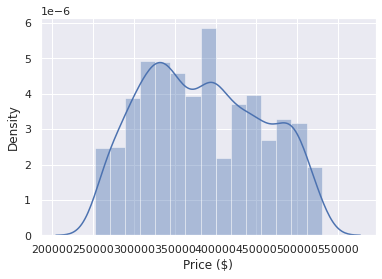

In [ ]:
# I am focusing near price mean region.


df_1=df[((df['Price ($)']<5.299000e+05) & (df['Price ($)']>2.5e5))]
ax = sns.distplot(df_1['Price ($)'])

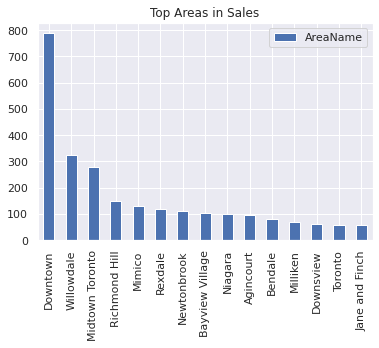

In [ ]:
# I would like to now what are the hottest neighbourhoods in sale.

Area= pd.DataFrame(df['AreaName'].value_counts())
Area.sort_values(by='AreaName')
Area[0:15].plot(kind='bar', title='Top Areas in Sales')

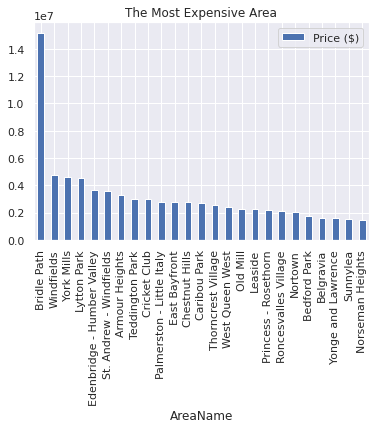

In [ ]:
# I would like to know what are the most expensive neighbourhoods.

AreaPrice=pd.DataFrame(df.groupby('AreaName')['Price ($)'].mean())
AreaPrice=AreaPrice.sort_values(by='Price ($)', ascending=False)
AreaPrice[0:25].plot(kind='bar', title='The Most Expensive Area')



In [ ]:
# Is it possible to buy a cheap house in expensive area?

# Here I am creating df1 as data frame for 5 to 15 most expensive areas (Top 5 are too expensive).
a=AreaPrice[5:15].index
df1=pd.DataFrame()
df1 = df[df.AreaName.isin(a)]

[Text(0, 0, 'St. Andrew - Windfields'),
 Text(0, 0, 'Armour Heights'),
 Text(0, 0, 'Chestnut Hills'),
 Text(0, 0, 'East Bayfront'),
 Text(0, 0, 'Thorncrest Village'),
 Text(0, 0, 'Cricket Club'),
 Text(0, 0, 'West Queen West'),
 Text(0, 0, 'Palmerston - Little Italy'),
 Text(0, 0, 'Teddington Park'),
 Text(0, 0, 'Caribou Park')]

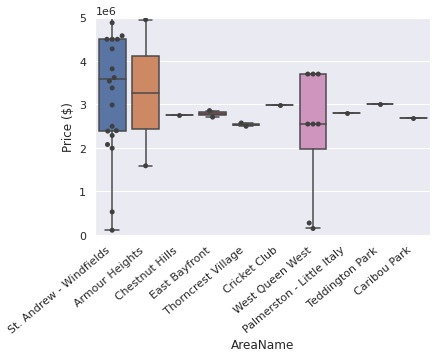

In [ ]:
# From following box graph, I can see Leaside and Nortown are expensive neighbourhoods with few affordable houses.


box = sns.boxplot(x='AreaName', y='Price ($)', data=df1)
box = sns.swarmplot(x='AreaName', y='Price ($)', data=df1, color=".25")
box.set_ylim([0, 0.5e7])      
box.set_xticklabels(box.get_xticklabels(), rotation=40, ha="right")

In [ ]:
# I created a table with average price and number of sales for each area, called result1
Area['Area']=Area.index
Area=Area.rename({'AreaName':'#Sale'}, axis=1)
AreaPrice['AreaName']=Area.index
result = pd.merge(Area, AreaPrice, on=Area['Area'])
result1=result[['#Sale','Price ($)']]





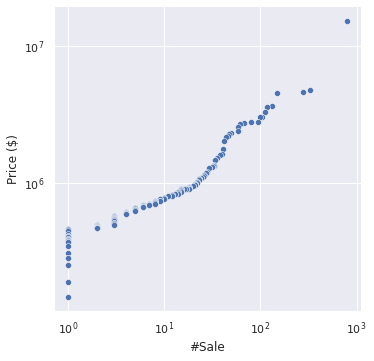

In [ ]:
# this graph shows number of sales vs price
cc = sns.cubehelix_palette(rot=-.2, as_cmap=True)
cv = sns.relplot(
    data=result1,
    x='#Sale', y='Price ($)',
    palette=cc, sizes=(5, 100),
)

cv.ax.xaxis.grid(True, "minor", linewidth=.05)
cv.ax.yaxis.grid(True, "minor", linewidth=.05)
cv.set(xscale='log', yscale='log')